# Bayesian A/B Testing and Conjugate Priors
### [Jack Bennetto](jack.bennetto@galvanize.com)
#### February 15, 2019

### Objectives

 * Define and explain prior, likelihood, and posterior.
 * Explain what a conjugate prior is and how it applies to A/B testing.
 * Explain the difference between Frequentist and Bayesian A/B tests.
 * Analyze an A/B test with the Bayesian approach.

In [ ]:
## Objectives
#### Define and explain prior, likelihood, and posterior.
    Prior: Probability distribution representing knowledge or uncertainty of a data object prior or before observing it.
    Likelihood: The probability of falling under a specific category or class.
    Posterior: Conditional probability distribution representing what parameters are likely after observing the data object.
#### Explain what a conjugate prior is and how it applies to A/B testing.
    -the prior distribution for θ is one of a family of parametrized distributions

#### Explain the difference between Frequentist and Bayesian A/B tests.
    -The frequentists methods, as based on the idea of drawing conclusions from the sample using the frequency or proportion of the data
    - A/B testing tools to help us make informed decisions based on collected data. 
#### Analyze an A/B test with the Bayesian approach.

### Agenda

 * Review Bayesian statistics.
 * Discuss an example of Bayesian A/B testing.
 * Discuss conjugate priors.
 * Compare to Bayesian and Frequentist approches.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats

# Bayes' Theorem

Recall **Bayes' Theorem**

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

When we use it in the context of statistics, we talk about the probability that a hypothesis $H$ is true, given some observed data $\mathbf{X}$.

$$P(H|\mathbf{X}) = \frac{P(\mathbf{X} | H) P(H)}{P(\mathbf{X})}$$

where

 * $P(H|\mathbf{X})$ is the **posterior probability distribution** of hypothesis $H$ being true, given observed data $\mathbf{X}$,
 * $P(\mathbf{X}|H)$ is the **likelihood** of observing $\mathbf{X}$ given $H$,
 * $P(H)$ is the **prior distribution** of $H$, and
 * $P(\mathbf{X})$, the **normalizing constant**, is

$$P(\mathbf{X}) = \sum_H P(\mathbf{X}|H) P(H)$$


# Example: Click-Through Rates

Consider two version of an ad on a website, A and B, where we want to know which produces a higher click-through rate. We can model the click-throughs for each version as a Bernoulli distribution with an unknown probability. Each possible value of $p_A$ and $p_B$ is a separate hypothesis. We will use Bayesian analysis to find probability distributions for these hypotheses.
 
Recall earlier we talked about the probability of a biased coin flipping heads. We can take that same approach here, except instead of flipping heads we're seeing if a user clicks on an ad.

Let's work through that again.

# Binomial Distribution (likelihood)

We've already talked about a binomial distribution, a discrete distribution measuring the number of successes from some number of trials. When talking about click-through rates, the likelihood of k successes out of n trials is

$${n \choose k} p^k (1-p)^{n-k}$$

where

* $p$ is the click-through rate (between 0 and 1),
* $n$ is the number of visitors, and
* $k$ is the number of conversions.

We're using the term **likelihood** because we're looking at the probability of seeing data given some model (which is specified by the click-through rate).

# Beta Distribution

A beta distribution is a continuous distribution with support (e.g., possible values) between 0 and 1. It has two shape parameters, $\alpha$ and $\beta$. The pdf is given by

$$f(p; \alpha, \beta) = \frac{p^{\alpha - 1}(1 - p)^{\beta - 1}}{B(\alpha, \beta)}$$

where $B(\alpha, \beta)$ is the beta function (it's really just a normalizing factor and isn't that important).

If $\alpha = \beta = 1$ we have a *uniform distribution*. The expectation value is $\frac{\alpha}{\alpha + \beta}$.

Hypothetical scenario:

You're transported to an alien planet, where you find a coin on the ground. You label one side as heads, and the other tails. Unlike back on Earth, you have absolutely no idea what proportion of the time flipping this coin will result in heads. You decide to model your uncertainty by using a Beta distribution.

We want to build a probability distribution for the value of `p`, which is the proportion of time the coin will come up heads.

**Question**: What are the upper and lower bounds on this distribution?

**Question**: What should this distribution look like before we perform any flips?

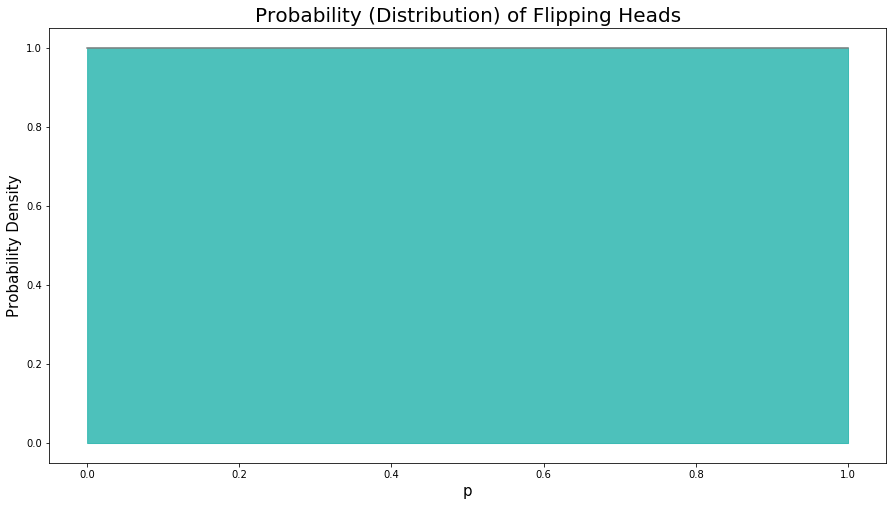

In [2]:
probs = np.linspace(0, 1, 1000)

n_heads = 0
n_tails = 0

distribution = stats.beta(a=1+n_heads, b=1+n_tails)
densities = distribution.pdf(probs)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(probs, densities, color='grey')
ax.fill_between(probs, densities, color='lightseagreen', alpha=.8)
ax.set_title(f'Probability (Distribution) of Flipping Heads', fontsize=20)
ax.set_xlabel('p', fontsize=15)
ax.set_ylabel('Probability Density', fontsize=15);

Text(0, 0.5, 'pdf')

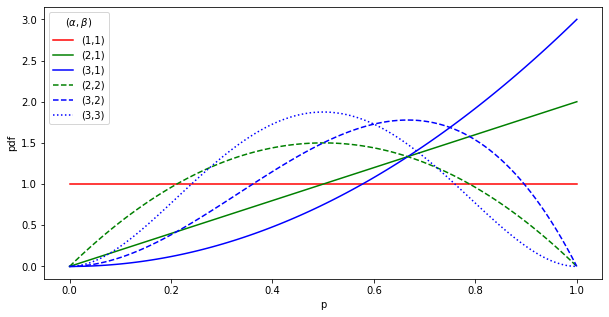

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(0,1,100)
for (a,b,s) in [(1,1,"r-"), (2,1,"g-"), (3,1,"b-"), (2,2,"g--"), (3,2,"b--"), (3,3,"b:")]:
        ax.plot(x,
                stats.beta(a,b).pdf(x),
                s,
                label="({0},{1})".format(a,b))
ax.legend(title=r"($\alpha,\beta$)", loc="upper left")
ax.set_xlabel("p")
ax.set_ylabel("pdf")

You don't see the beta distribution that often, but one situation is in the distribution of ordered quantities. If you choose $n$ random values from $U(0,1)$, the distribution of the $k^\text{th}$ smallest is given by $Beta(k, n-k+1)$. So, for example, if the you choose five random numbers, the distribution of the 1st, 2nd, 3rd, 4th, and 5th numbers are given by the graphs below.

Text(0, 0.5, 'pdf')

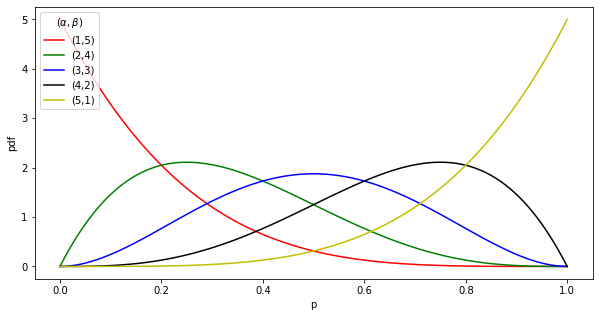

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(0,1,100)
for (a,b,s) in [(1,5,"r-"), (2,4,"g-"), (3,3,"b-"), (4,2,"k-"), (5,1,"y-")]:
        ax.plot(x,
                stats.beta(a,b).pdf(x),
                s,
                label="({0},{1})".format(a,b))
ax.legend(title=r"($\alpha,\beta$)", loc="upper left")
ax.set_xlabel("p")
ax.set_ylabel("pdf")

But we're using the beta distribution for something else.

It turns out that if the prior probabilities are given by a beta distribution, and the likelihood function is given by a Bernoulli (or binomial) distribution, then the posterior distribution will also be given by a beta distribution. In this case the formula for 

$$f(p; \alpha, \beta) = \frac{p^{\alpha - 1}(1 - p)^{\beta - 1}}{B(\alpha, \beta)}$$

where

* $p$ is the conversion rate (**between 0 and 1**) and
* $\alpha$, $\beta$ are the shape parameters:
    * $\alpha$ = 1 + number of conversions and
    * $\beta$ = 1 + number of non-conversions.


### Conjugate Priors

The beta distribution is said to be a **conjugate prior** of the Bernoulli distribution.

$$\begin{aligned}
posterior &\propto prior * likelihood \\
beta &\propto beta * binomial \\
&= \frac{p^{\alpha - 1}(1 - p)^{\beta - 1}}{B(\alpha, \beta)} * {n \choose k} p^k (1-p)^{n-k} \\
&\propto p^{\alpha - 1}(1 - p)^{\beta - 1} * p^k (1-p)^{n-k} \\
&\propto p^{\alpha + k - 1}(1 - p)^{\beta + n - k - 1}
\end{aligned}$$

So the resulting posterior distribution is is a beta distribution with parameters $\alpha + k$ and $\beta + n - k$


A conjugate prior for a likelihood is a class of functions such that if the prior is in the class, so is the posterior. There are [many listed in Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions).

Likelihood                 | Prior
---------------------------|------------
Bernoulli/Binomial         | Beta distribution
Normal with known $\sigma$ | Normal distribution
Poisson                    | Gamma
Uniform                    | Pareto

How important are these to doing Bayesian statistics?

## A/B testing

How do we turn this into A/B testing? Let's go back to comparing CTR for two different ads. We collect data for each ad, of how many successes and failures we get for each. Suppose it's something like:

In [4]:
success_a = 166
failure_a = 2540
success_b = 162
failure_b = 2132

Let's start with a uniform prior for the CTR for each. The happens to be a beta function, so we can use conjugate priors. Let graph the posteriors to see what they look like.

Text(0.5, 1.0, 'Posterior Probabilities of CTR for Two Ad Campaigns')

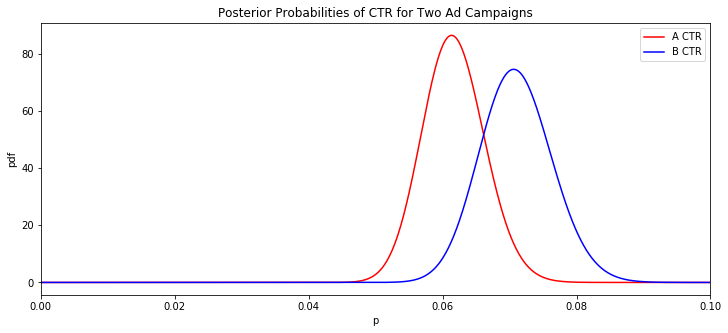

In [5]:
fig, ax = plt.subplots(figsize=(12,5))
x = np.linspace(0,1,10000)
for (a,b,s, label) in [(success_a+1, failure_a+1,"r", "A CTR"),
                       (success_b+1, failure_b+1,"b", "B CTR")]:
        ax.plot(x,
                stats.beta(a,b).pdf(x),
                s,
                label=label)
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0, 0.1)
ax.set_title("Posterior Probabilities of CTR for Two Ad Campaigns")

Suppose we want to know the probability that B is better than A.

Since it's a continuous problem we have an infinite number of possible values, so it's a little hard to deal with. One approach, which we'll take in the exercise, is to sample a large number of values from each distribution, and see how often the value taken from one distribution is bigger than the other.

**Exercise**: Use random sampling to return the probability that `B` is better than `A`.

In [6]:
dist_a = stats.beta(success_a+1, failure_a+1)
dist_b = stats.beta(success_b+1, failure_b+1)

In [14]:
(dist_a.rvs(100000) < dist_b.rvs(100000)).mean()

0.90587

One of the wonderful things about the fact that we're doing a Bayesian A/B test is flexibilty, we can calculate pretty much anything we want.

**Exercise**: Modify your code above to calculate the probability that `B` is at least 10% better than `A`.

In [15]:
((dist_a.rvs(1000000)*1.1) < dist_b.rvs(1000000)).mean()

0.665784

## Frequentist vs. Bayesian

In both cases, we consider an ensemble of possible randomly generated universes.

Frequentist: The hypothesis is a fixed (though unknown) reality; the observed data follows some random distribution

Bayesian: The observed data is a fixed reality; the hypotheses follow some random distribution.

## Frequentist A/B testing

Frequentist procedure

* Choose n (number of experiments/samples) based on expected size of effect.
* Run **all** experiments and observe the data.
* The significance is probability of getting result (or more extreme) assuming no effect.
* Doesn't tell you how likely it is that a is better than b.

(aside: Wald sequential analysis)

## Bayesian A/B testing

Bayesian procedure

* No need to choose n beforehand.
* Update knowledge as the experiment runs.
* Gives probability of *anything you want*.

**Discussion:** Why doesn't everyone like this better?